# Programming HW 1

## Code

In [1]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [3]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [4]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [37]:
def naive_with_rc(p, t):
    # O(2N) inefficient but workable
    
    occurrences = []
    rc = reverseComplement(p)
    rc_is_anagram = p == rc

    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)

    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != rc[j]:
                match = False
                break
        if match:
            occurrences.append(i)
            
    if rc_is_anagram:
        occurrences = [o for o in set(occurrences)]
    occurrences.sort()
    return occurrences

In [ ]:
def naive_2mm(p, t):
    occurrences = []

    for i in range(len(t) - len(p) + 1):
        match = True
        mismatches = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                if mismatches < 2:
                    mismatches += 1
                else:
                    match = False
                    break
        if match:
            occurrences.append(i)
    return occurrences

In [87]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1

    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])

    return gc    

## Test cases

In [47]:
# test 0a
p = 'ACT'
t = 'CATGACCACTGG'
naive_with_rc(p, t)

[7]

In [48]:
assert naive_with_rc(p, t) == [7]

In [50]:
# test 1
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
occurrences

[10, 23]

In [51]:
assert occurrences == [10, 23]

In [52]:
# test 2
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [53]:
assert occurrences == [10, 24]

In [54]:
# Phi-X genome (test 3)
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa -O data/phix.fa

--2023-10-13 16:46:05--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.227.230.46, 13.227.230.229, 13.227.230.125, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.227.230.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘data/phix.fa’

data/phix.fa        100%[===================>]   5.40K  --.-KB/s    in 0.001s  

2023-10-13 16:46:05 (5.47 MB/s) - ‘data/phix.fa’ saved [5528/5528]



In [55]:
phix_genome = readGenome('data/phix.fa')

In [56]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [57]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


In [58]:
assert min(occurrences) == 62

In [59]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


In [60]:
assert len(occurrences) == 60

In [ ]:
# test-case 1 (naive_2mm)
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

In [ ]:
# test-case 2
occurrences = naive_2mm('GATTACA', phix_genome)
print(f"min: {min(occurrences)} len: {len(occurrences)}")

## Quiz

In [61]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa -O data/lambda_virus.fa

--2023-10-13 16:47:36--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.225.0.145, 13.225.0.166, 13.225.0.220, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.225.0.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘data/lambda_virus.fa’

data/lambda_virus.f 100%[===================>]  48.12K   106KB/s    in 0.5s    

2023-10-13 16:47:37 (106 KB/s) - ‘data/lambda_virus.fa’ saved [49270/49270]



In [63]:
genome = readGenome('data/lambda_virus.fa')

In [64]:
genome[:25]

'GGGCGGCGACCTCGCGGGTTTTCGC'

In [65]:
p = 'AGGT'
occ = naive_with_rc(p, genome)
len(occ)

306

In [66]:
p = 'TTAA'
occ = naive_with_rc(p, genome)
len(occ)

195

In [69]:
p = 'ACTAAGT'
occ = naive_with_rc(p, genome)
min(occ)

26028

In [70]:
p = 'AGTCGA'
occ = naive_with_rc(p, genome)
min(occ)

450

In [78]:
p = 'TTCAAGCC'
occ = naive_2mm(p, genome)
len(occ)

191

In [79]:
p = 'AGGAGGTT'
occ = naive_2mm(p, genome)
min(occ)

49

In [83]:
import glob
err_file = glob.glob('data/ERR*')[0]
err_file

'data/ERR266411_1.first1000.fastq'

In [107]:
seq, qual = readFastq(err_file)

In [108]:
seq[:25]

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG',
 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT',
 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGC

In [109]:
qual[:25]

['B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG',
 "=@@CEBF@BGBG6GF1E<04C3E7E.9G=H<H:HH;HBH;G69F7,7DG((EG8A8,-5-8,?,,,AE>C,B?,,,64$AC'+'='+4'3*4+E322*'(",
 '@@DFEEFFGFGGGFFHGHGGIGGGHIHGFIEHGHHHHFIGGEHFGHGFHGHEGHGGFGFDGHHGIHCGDFFDFDGEIGGFGHGGHGCFFGGGDGEFCFCD',
 'A@DFEFFFGDGGGHFHHHGHGGFGHILGFGEHHHFHHFIGHGHFGHGGGEHGGHJGGHFGFGHHEHFGHICKFGJEIGGIFGGGHGGFHIEEGGEFGKGD',
 'B@DFEHFEGEGGGHGFGHGHFFGGGI@GDFHHFFHGHGGFHCHFGHCIGEH9CHGEFGFHFDHEIHCGFGFDDCCGIDGIGKGGHGCFGIFGG;HFGFIE',
 '8@DCDD=@GGBGGGHEEHGAGCF@=IG?EAE8:DF;7BBGGGGF7@7GH8ACAHAE7H=AE,E@7D4C5CEGGB>BBBG54>G4=AG44@F4GEB<G*2G',
 'B@DFEHFFGEGGGFFHGHGHFGFGFIGGFGEHIHHHHFIEGGEFGHGGGFHFGHGGGHFHGHHHEHHGHFHGGGJJIGGGGGGGJGGFHGGEGGHFGGG@',
 'B@DFEDFEGGGGGFFHEHGIGGGGFIGGHHFHHHHGHGFGHHHFGEGFGGHGGHJGGHFHGEHH,HGGHFHGFAGEHHGIGCGGFGEFHFFGGDGFEGGD',
 '@@DFE9DFGEGDGD?HGHGBFCFEEDE?DFDDGG97BFHB6GEDA@GGGEHEGAHCEGFFAEFHEHFGHFEK?DJEHDGIGDGGHGGGJF@GFFE9C2GE',
 'B@DFEEFEGIGGGGGGGHGHGGGGFIFGGIFHFHHEHFHGHGHFGEGGHG8EG

In [88]:
gc = findGCByPos(seq)

In [89]:
gc[:25]

[0.5,
 0.5,
 0.532,
 0.531,
 0.497,
 0.473,
 0.467,
 0.546,
 0.498,
 0.503,
 0.511,
 0.479,
 0.529,
 0.478,
 0.392,
 0.468,
 0.43,
 0.408,
 0.427,
 0.458,
 0.477,
 0.453,
 0.448,
 0.464,
 0.394]

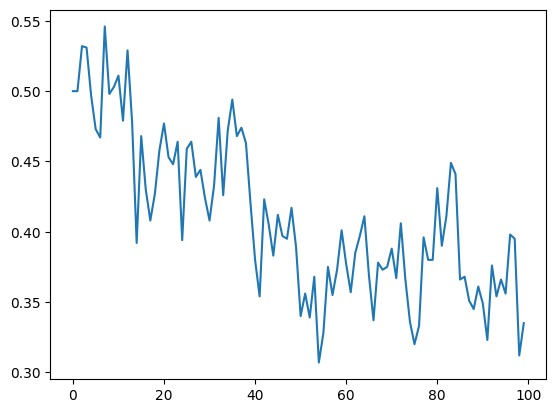

In [90]:
import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)

In [91]:
# look at qualities?
def phred33ToQ(qual):
    return ord(qual) - 33
qual_score = []
for qual_string in qual:
    for qual in qual_string:
        qual_score.append(phred33ToQ(qual))

In [95]:
min(qual_score)

0

In [96]:
qual_score.index(0)

33022

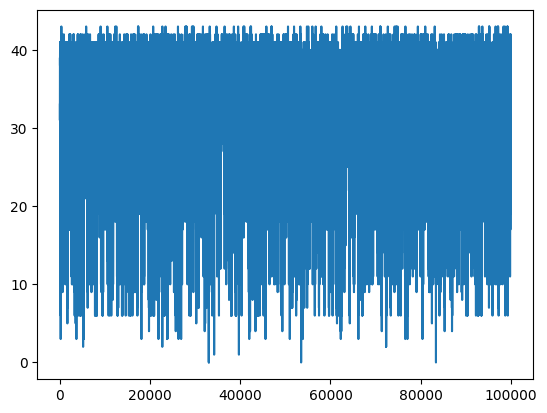

In [98]:
plt.plot(range(len(qual_score)), qual_score)

In [110]:
qual[:10]

['B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG',
 "=@@CEBF@BGBG6GF1E<04C3E7E.9G=H<H:HH;HBH;G69F7,7DG((EG8A8,-5-8,?,,,AE>C,B?,,,64$AC'+'='+4'3*4+E322*'(",
 '@@DFEEFFGFGGGFFHGHGGIGGGHIHGFIEHGHHHHFIGGEHFGHGFHGHEGHGGFGFDGHHGIHCGDFFDFDGEIGGFGHGGHGCFFGGGDGEFCFCD',
 'A@DFEFFFGDGGGHFHHHGHGGFGHILGFGEHHHFHHFIGHGHFGHGGGEHGGHJGGHFGFGHHEHFGHICKFGJEIGGIFGGGHGGFHIEEGGEFGKGD',
 'B@DFEHFEGEGGGHGFGHGHFFGGGI@GDFHHFFHGHGGFHCHFGHCIGEH9CHGEFGFHFDHEIHCGFGFDDCCGIDGIGKGGHGCFGIFGG;HFGFIE',
 '8@DCDD=@GGBGGGHEEHGAGCF@=IG?EAE8:DF;7BBGGGGF7@7GH8ACAHAE7H=AE,E@7D4C5CEGGB>BBBG54>G4=AG44@F4GEB<G*2G',
 'B@DFEHFFGEGGGFFHGHGHFGFGFIGGFGEHIHHHHFIEGGEFGHGGGFHFGHGGGHFHGHHHEHHGHFHGGGJJIGGGGGGGJGGFHGGEGGHFGGG@',
 'B@DFEDFEGGGGGFFHEHGIGGGGFIGGHHFHHHHGHGFGHHHFGEGFGGHGGHJGGHFHGEHH,HGGHFHGFAGEHHGIGCGGFGEFHFFGGDGFEGGD',
 '@@DFE9DFGEGDGD?HGHGBFCFEEDE?DFDDGG97BFHB6GEDA@GGGEHEGAHCEGFFAEFHEHFGHFEK?DJEHDGIGDGGHGGGJF@GFFE9C2GE',
 'B@DFEEFEGIGGGGGGGHGHGGGGFIFGGIFHFHHEHFHGHGHFGEGGHG8EG

In [114]:
# look at per-base quality
def get_average_quality(quals):
    average_quals = []
    for i in range(len(quals[0])):
        qual_scores = []
        for q in quals:
            qual_scores.append(phred33ToQ(q[i]))
        average_quals.append(sum(qual_scores)/len(qual_scores))
        qual_scores.clear()
    return average_quals

In [115]:
avg_qual = get_average_quality(qual)

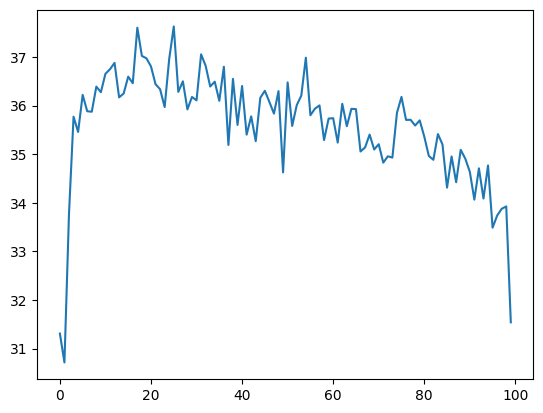

In [119]:
plt.plot(range(len(avg_qual)), avg_qual)
plt.show()

In [120]:
avg_qual[:3]

[31.309, 30.714, 33.776]

In [121]:
min(avg_qual)

30.714

In [123]:
avg_qual[-1]

31.54